<a href="https://colab.research.google.com/github/RochX/comp486-assignments/blob/main/project/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project
## New York City AirBNB prices

## Investigating and Cleaning our Data

In [1]:
from pathlib import Path
import pandas as pd
import urllib.request

# download the data if it is not downloaded
if not Path("new_york_listings_2024.csv").is_file():
  # here I download the data from my personal git repo for this class instead of using Google Drive
  url = "https://raw.githubusercontent.com/RochX/comp486-assignments/main/project/new_york_listings_2024.csv"
  urllib.request.urlretrieve(url, "new_york_listings_2024.csv")

new_york_listings_2024 = pd.read_csv("new_york_listings_2024.csv")
new_york_listings_2024.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
5,49584983,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,2023-07-29,0.16,139,276,2,No License,5.0,1,1,1
6,45457047,Rental unit in New York · ★4.33 · Studio · 1 b...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.767370,-73.987870,Entire home/apt,105.0,...,2022-08-31,0.10,139,364,0,No License,4.33,Studio,1,1
7,45847112,Rental unit in New York · ★4.50 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.765190,-73.990130,Entire home/apt,130.0,...,2023-05-30,0.26,139,295,2,No License,4.50,2,2,1
8,19280212,Rental unit in Brooklyn · ★4.79 · 1 bedroom · ...,2526182,Margaux,Brooklyn,Williamsburg,40.711530,-73.953120,Private room,90.0,...,2023-10-01,0.24,2,5,2,No License,4.79,1,1,1
9,895681617796889995,Rental unit in Brooklyn · ★4.67 · 1 bedroom · ...,14251313,Kristin,Brooklyn,Sunset Park,40.658913,-73.989590,Entire home/apt,292.0,...,2023-10-19,1.71,1,365,12,No License,4.67,1,1,1


Get some information on the data.

In [2]:
new_york_listings_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

Take a look at the categorical features listed (besides `name` and `host_name`).

In [3]:
for col in list(new_york_listings_2024.drop(["name", "host_name"], axis=1).select_dtypes(include=["object"])):
  if col != "baths":
    print(new_york_listings_2024.value_counts(col), end="\n\n\n")
  else:
    print(new_york_listings_2024.value_counts(col))

neighbourhood_group
Manhattan        8038
Brooklyn         7719
Queens           3761
Bronx             949
Staten Island     291
dtype: int64


neighbourhood
Bedford-Stuyvesant            1586
Harlem                        1063
Williamsburg                   969
Midtown                        942
Hell's Kitchen                 867
                              ... 
Bay Terrace, Staten Island       1
Navy Yard                        1
Lighthouse Hill                  1
Chelsea, Staten Island           1
Neponsit                         1
Length: 221, dtype: int64


room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
dtype: int64


last_review
2023-09-04    326
2023-12-03    255
2023-12-17    244
2023-09-05    223
2023-11-30    212
             ... 
2020-04-17      1
2020-04-16      1
2020-04-15      1
2020-04-14      1
2021-03-21      1
Length: 1878, dtype: int64


license
No License            17569
Exempt                 2135


We see that some of these "categorical" features are actually numeric except with "missing data" or something similar as actual data.
These features are `rating`, `bedrooms`, and `baths`.
We can make the following corrections for each feature:
- `rating`: Convert `No Rating` and `New ` into `NaN`
- `bedrooms`: Convert `Studio` into `1`. Studio apartments are basically 1 bedroom apartments, but the bed isn't in its own room.
- `baths`: Convert `Not specified` into `NaN`.

Let's clean the data in accordance to this.

In [4]:
cleaned_data = new_york_listings_2024
cleaned_data["rating"] = new_york_listings_2024["rating"].replace({"No rating": None, "New ": None})
cleaned_data["bedrooms"] = new_york_listings_2024["bedrooms"].replace({"Studio": "1"})
cleaned_data["baths"] = new_york_listings_2024["baths"].replace({"Not specified": None})

obj_to_num_cols = ["rating", "bedrooms", "baths"]
cleaned_data[obj_to_num_cols] = cleaned_data[obj_to_num_cols].apply(pd.to_numeric)

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

Now that `rating`, `bedrooms`, and `baths` are numeric values, let's try creating a correlation matrix for `price`.

In [5]:
cleaned_data.corr()["price"]

<ipython-input-5-d7c83fdcafbc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_data.corr()["price"]


id                                0.002372
host_id                          -0.005987
latitude                         -0.001143
longitude                        -0.033460
price                             1.000000
minimum_nights                   -0.006527
number_of_reviews                -0.012588
reviews_per_month                -0.009917
calculated_host_listings_count   -0.007333
availability_365                  0.020151
number_of_reviews_ltm            -0.011263
rating                           -0.004692
bedrooms                          0.074036
beds                              0.066882
baths                             0.066048
Name: price, dtype: float64

### Removing Outliers

Let's take a look at the numerical data with the `describe` function.

In [6]:
cleaned_data.drop(["id", "host_id"], axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,17006.000000,20758.000000,20758.000000,20745.000000
mean,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,4.734253,1.394161,1.723721,1.177995
std,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,0.294387,0.788123,1.212272,0.480456
min,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.750000,1.000000,1.000000,0.000000
25%,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,4.640000,1.000000,1.000000,1.000000
50%,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,4.810000,1.000000,1.000000,1.000000
75%,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,4.930000,2.000000,2.000000,1.000000
max,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,5.000000,15.000000,42.000000,15.500000


We see possibility of outliers, so only take data that is between 1% and 99% percentile and then compute the correlation matrix.

In [7]:
lower_q, higher_q = cleaned_data['price'].quantile(q=0.01), cleaned_data['price'].quantile(q=0.99)
quantiled_data = cleaned_data[(cleaned_data['price'] <= higher_q) & (cleaned_data['price'] >= lower_q)]
quantiled_data.corr()['price']

<ipython-input-7-ead6bc75297d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiled_data.corr()['price']


id                                0.062969
host_id                           0.006006
latitude                          0.004912
longitude                        -0.195528
price                             1.000000
minimum_nights                   -0.048641
number_of_reviews                -0.041413
reviews_per_month                -0.005932
calculated_host_listings_count   -0.002018
availability_365                  0.040035
number_of_reviews_ltm            -0.023203
rating                            0.099203
bedrooms                          0.445540
beds                              0.428344
baths                             0.319319
Name: price, dtype: float64

### Group Data by Neighborhood

In [10]:
quantiled_data['neighbourhood_group'].value_counts()

Manhattan        7849
Brooklyn         7629
Queens           3670
Bronx             931
Staten Island     290
Name: neighbourhood_group, dtype: int64

In [11]:
neighbourhood_data = quantiled_data.groupby('neighbourhood_group')

In [20]:
neighbourhood_data['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,931.0,108.395274,73.258509,35.0,60.0,90.0,129.0,585.0
Brooklyn,7629.0,154.157163,118.062081,33.0,79.0,125.0,193.0,999.0
Manhattan,7849.0,194.064594,148.888984,33.0,100.0,150.0,232.0,999.0
Queens,3670.0,122.936240,89.872186,33.0,65.0,99.0,150.0,914.0
Staten Island,290.0,115.741379,75.855070,33.0,70.0,99.0,135.0,559.0


neighbourhood_group
Bronx            Axes(0.1,0.15;0.8x0.75)
Brooklyn         Axes(0.1,0.15;0.8x0.75)
Manhattan        Axes(0.1,0.15;0.8x0.75)
Queens           Axes(0.1,0.15;0.8x0.75)
Staten Island    Axes(0.1,0.15;0.8x0.75)
dtype: object

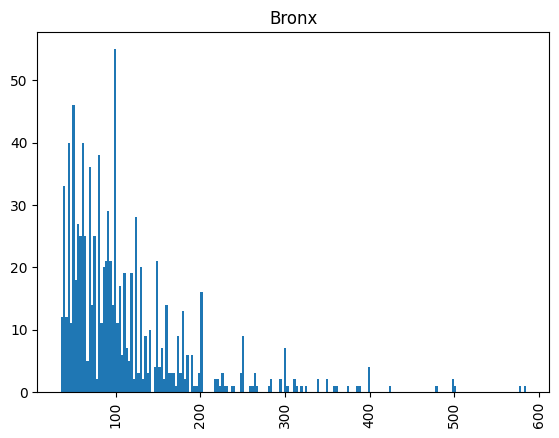

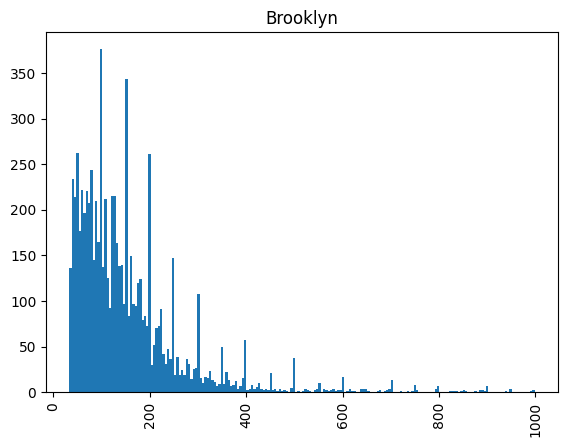

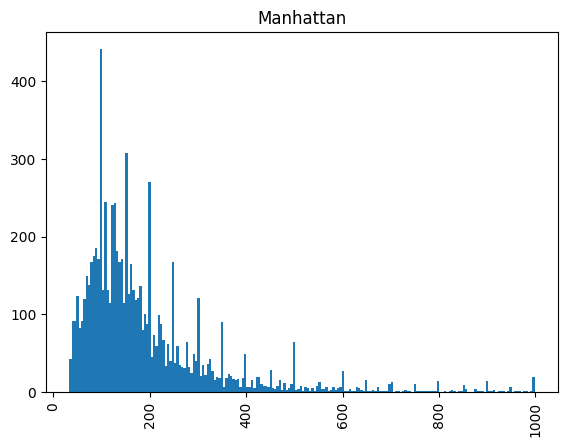

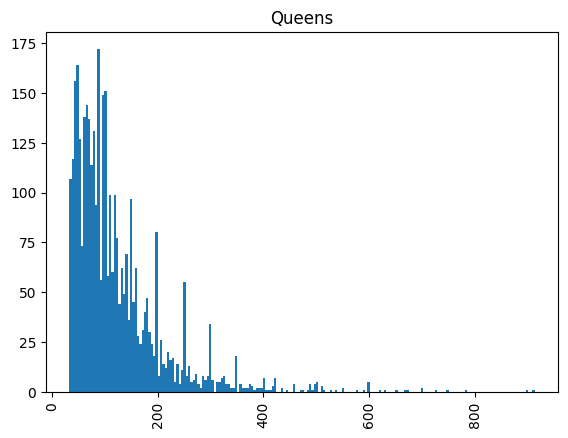

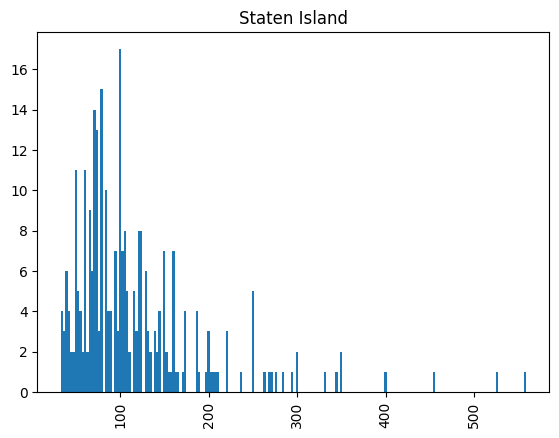

In [29]:
neighbourhood_data.hist(column='price', by='neighbourhood_group', bins=200)

## Train some Models

TODO!